In [36]:
# Лабораторная работа № 5
### вариант № 2   Лила.В.Я
### группа: РИМ-101211      

In [37]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

Создадим два АР(1) процесса первого порядка:

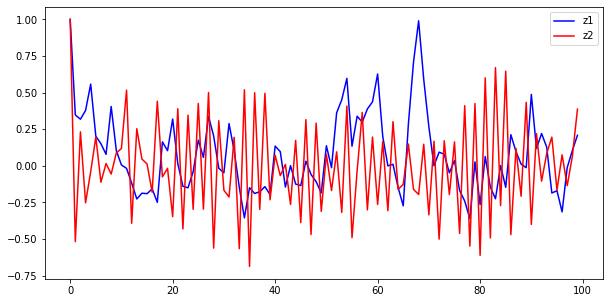

In [38]:
z1 = np.zeros(100)
z2 = np.zeros(100)
z1[0] = 1
z2[0] = 1
for i in range(1,100):
    z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()
    z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b', label='z1')
plt.plot(z2, 'r', label='z2')
plt.legend()
plt.show()

Построим для этих рядов функции автокорреляции с помощью функции plot_acf:

Значения АКФ z1 [ 1.          0.58777119  0.3805723   0.16226877  0.11470593  0.01309516
  0.05220361  0.06011784  0.03938302 -0.03174003 -0.10454116 -0.07944047
 -0.0720621  -0.03671621 -0.04052422 -0.0590683  -0.06016415 -0.11465518
 -0.08790012 -0.10380431 -0.08493577]
Значения АКФ z2 [ 1.         -0.76508726  0.6343886  -0.51483822  0.44219146 -0.36573865
  0.32965249 -0.27565712  0.23313163 -0.19704267  0.18063716 -0.10980291
  0.11530351 -0.10123166  0.08433635 -0.03571648  0.02668203  0.01390689
 -0.01120715  0.02442781 -0.06907197]
/home/weslyg/math/.venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/home/weslyg/math/.venv/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppre

<Figure size 720x360 with 0 Axes>

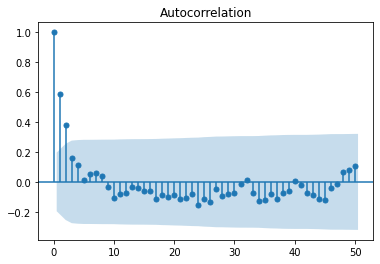

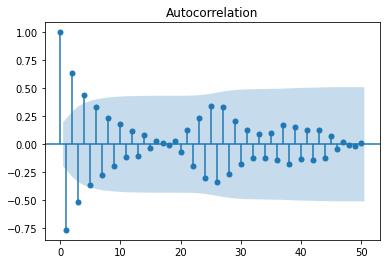

In [39]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
print('Значения АКФ z1',acf(z1,nlags=20)) 
plot_acf(z2, lags=50)
print('Значения АКФ z2',acf(z2,nlags=20)) 
plt.show()



Если положительный коэффициент, то выглядит как экспоненциально убывающая прямая. Если отрицательный коэффициент, то наблюдается знакопеременная "треугольная" последовательность.
Видим, что первый лаг имеет значение близкое к 0,8 (наш выборочный коэффициент)

Аналогичным образом построим два СС(1) процесса среднего-скользящего первого порядка:

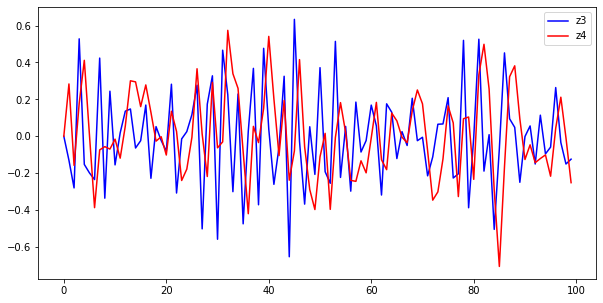

In [40]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
    z3[i] = ar[i] - 0.8 * ar[i - 1]
    z4[i] = ar[i] + 0.8 * ar[i - 1]
plt.figure(figsize = (10, 5))
plt.plot(z3, 'b', label='z3')
plt.plot(z4, 'r',label='z4')
plt.legend()
plt.show()

<Figure size 720x360 with 0 Axes>

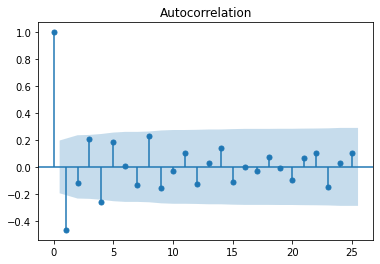

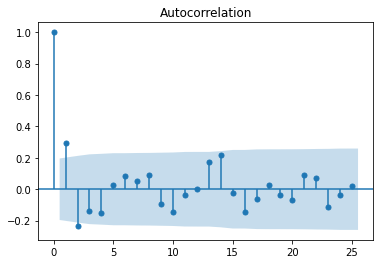

In [41]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=25)
plot_acf(z4, lags=25)
plt.show()

В случае скользящего среднего первого порядка, первый лаг вышел за границы доверительного интервала

### Создадим временной ряд процесса:

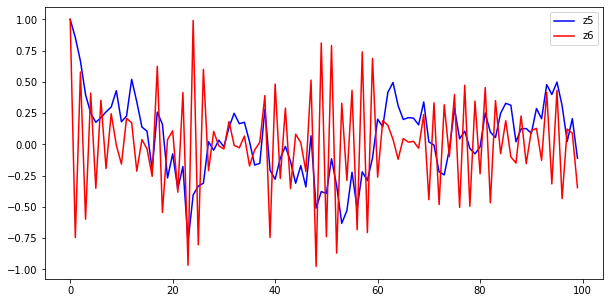

<Figure size 720x360 with 0 Axes>

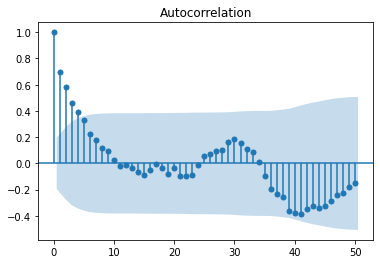

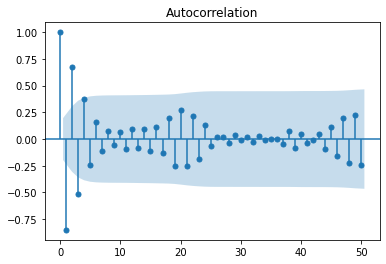

In [42]:
z5 = np.zeros(100)
z6 = np.zeros(100)
z5[0] = 1
z6[0] = 1
ar = 0.2 * np.random.randn(100)
for i in range(1,100):
    z5[i] =  0.8 * z5[i - 1] + ar[i] - 0.3*ar[i-1]
    z6[i] = -0.8 * z6[i - 1] + ar[i] - 0.3*ar[i-1]
plt.figure(figsize = (10, 5))
plt.plot(z5, 'b', label='z5')
plt.plot(z6, 'r',label='z6')
plt.legend()
plt.show()

plt.figure(figsize = (10, 5))
plot_acf(z5, lags=50)
plot_acf(z6, lags=50)
plt.show()

Есть и другой, более высокоуровневый способ генерации рядов
АРПСС. Используем следующую функцию для создания АРСС (2, 2):

In [43]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35]) # задаем коэффициенты СС
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100)
# создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

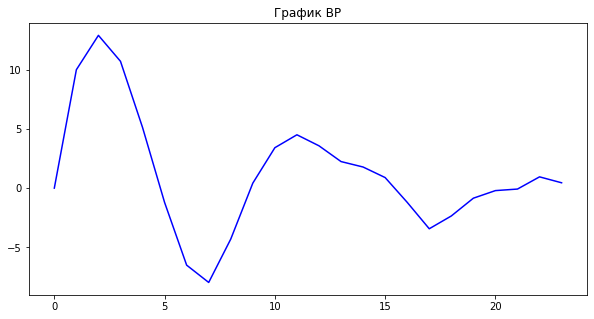

<Figure size 720x360 with 0 Axes>

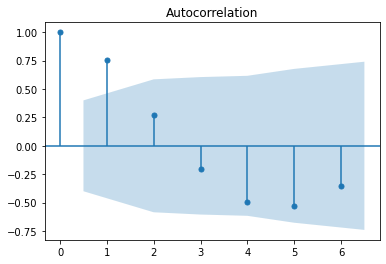

In [44]:
TEST = [0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41, 4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95, 0.45]

plt.figure(figsize = (10, 5))
plt.plot(TEST, 'b')
plt.title('График ВР')
plt.show()

plt.figure(figsize = (10, 5))
plot_acf(TEST, lags=6)
plt.show()

Можно судить, что ВР, в достаточной степени, стационарен, а, так как, эта функция является знакопеременной, то один из членов АР модели имеет отрицательный вес.
Создадим три пробные модели АРПСС для проверки ряда на
АР(1) = АРПСС(1, 0, 0), АР(2), АР(3), без тренда (trend = ‘nc’):

In [45]:
arima1 = ARIMA(TEST, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов

arima2 = ARIMA(TEST, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(TEST, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -62.425
Method:                       css-mle   S.D. of innovations              3.207
Date:                Wed, 16 Jun 2021   AIC                            128.850
Time:                        14:07:50   BIC                            131.206
Sample:                             0   HQIC                           129.475
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7426      0.123      6.053      0.000       0.502       0.983
                                    Roots                                    
                  Real          Imaginary           M

В любом случае, лучшей моделью будет та, что имеет наименьшее значение информационного критерия среди множества других. Рекомендуется, в первую очередь, выбирать по критерию BIC, так как он сильнее штрафует за переобучение модели и увеличение числа параметров по сравнению с другими. В нашем
случае для тестового ВР, для любых информационных критериев, это модель АР(2).

Другим методом выбора модели может служить построение моделей АРПСС выбранного порядка и с найденными коэффициентам на графиках совмещенно.

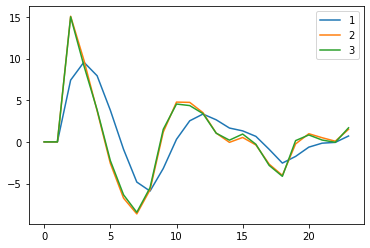

In [46]:
plt.plot(model_fit1.fittedvalues, label='1')
plt.plot(model_fit2.fittedvalues, label='2')
plt.plot(model_fit3.fittedvalues, label='3')
plt.legend()
plt.show()

<Figure size 720x360 with 0 Axes>

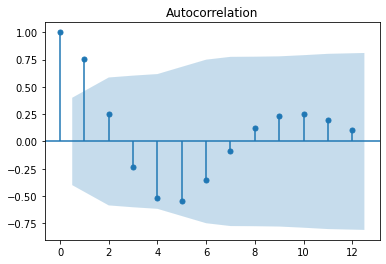

<Figure size 1440x360 with 0 Axes>

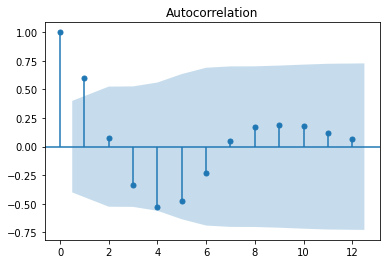

In [47]:
plt.figure(figsize = (10, 5))
plot_acf(model_fit1.fittedvalues, lags=12)
plt.show()

plt.figure(figsize = (20, 5))
plot_acf(model_fit2.fittedvalues, lags=12)
plt.show()

Теперь найдем весовые коэффициенты для АР моделей 1 и 2 порядка

In [48]:
fi =0.755 # Весовой коэффициент для АР моделей первого порядка
p1=0.755
p2=0.2725
fi1 = (p1*(1-p2))/(1-p1**2)
fi2 = (p2-p1**2)/(1-p1**2)

print('Весовые коэффициенты для АР моделей второго порядка:')
print(fi1)
print(fi2)

Весовые коэффициенты для АР моделей второго порядка:
1.2774289202860631
-0.6919588348159776


### Загрузим индивидуальный временной ряд

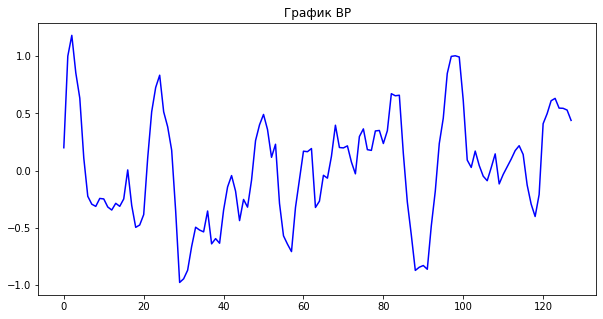

<Figure size 720x360 with 0 Axes>

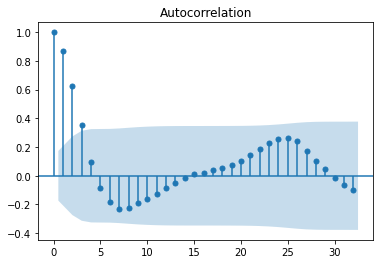

In [49]:
file = h5py.File('./files/2.mat', 'r')
data = file.get('z2')
Z = np.array(data)

plt.figure(figsize = (10, 5))
plt.plot(Z, 'b')
plt.title('График ВР')
plt.show()

plt.figure(figsize = (10, 5))
plot_acf(Z, lags=32)
plt.show()

/home/weslyg/math/.venv/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/weslyg/math/.venv/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.

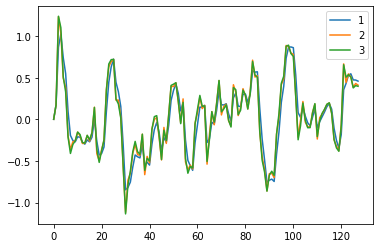

In [50]:
arima1 = ARIMA(Z, order = (1, 0, 0))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Z, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

plt.plot(model_fit1.fittedvalues, label='1')
plt.plot(model_fit2.fittedvalues, label='2')
plt.plot(model_fit3.fittedvalues, label='3')
plt.legend()
plt.show()

Выбираем АР(1) (имеет наименьший параметр BIC)

<Figure size 720x360 with 0 Axes>

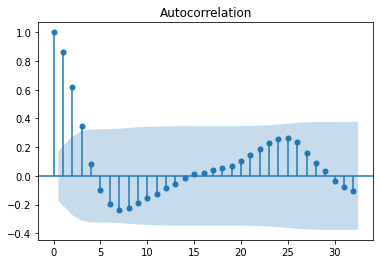

<Figure size 1440x360 with 0 Axes>

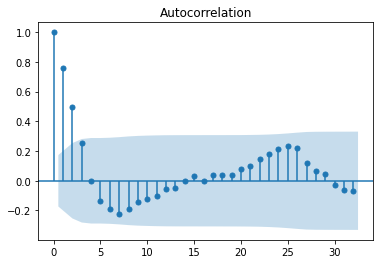

<Figure size 1440x360 with 0 Axes>

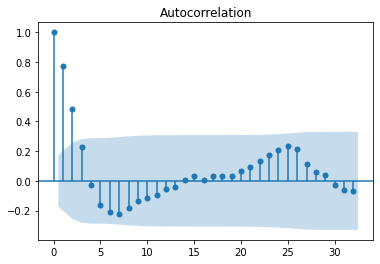

In [51]:
plt.figure(figsize = (10, 5))
plot_acf(model_fit1.fittedvalues, lags=32)
plt.show()

plt.figure(figsize = (20, 5))
plot_acf(model_fit2.fittedvalues, lags=32)
plt.show()

plt.figure(figsize = (20, 5))
plot_acf(model_fit3.fittedvalues, lags=32)
plt.show()

Коэффициенты в значениях лагов АКФ

In [52]:
arima1 = ARIMA(Z, order = (0, 0, 1))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (0, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Z, order = (0, 0, 3))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

plt.plot(model_fit1.fittedvalues, label='1')
plt.plot(model_fit2.fittedvalues, label='2')
plt.plot(model_fit3.fittedvalues, label='3')
plt.legend()
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(0, 1)   Log Likelihood                 -23.534
Method:                       css-mle   S.D. of innovations              0.290
Date:                Wed, 16 Jun 2021   AIC                             51.069
Time:                        14:07:52   BIC                             56.773
Sample:                             0   HQIC                            53.386
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.8267      0.035     23.879      0.000       0.759       0.895
                                    Roots                                    
                  Real          Imaginary           M

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(0, 1)   Log Likelihood                  22.512
Method:                       css-mle   S.D. of innovations              0.203
Date:                Sun, 30 May 2021   AIC                            -41.025
Time:                        23:27:05   BIC                            -35.321
Sample:                             0   HQIC                           -38.707
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.3307      0.074      4.476      0.000       0.186       0.476
                                    Roots                                    
                  Real          Imaginary           M

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(2, 1)   Log Likelihood                  23.255
Method:                       css-mle   S.D. of innovations              0.202
Date:                Sun, 30 May 2021   AIC                            -38.511
Time:                        23:27:05   BIC                            -27.103
Sample:                             0   HQIC                           -33.876
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.5299      0.426      1.244      0.214      -0.305       1.365
ar.L2.y       -0.1739      0.160     -1.086      0.277      -0.488       0.140
ma.L1.y       -0.1548      0.426     -0.364      0.7

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(3, 1)   Log Likelihood                  24.183
Method:                       css-mle   S.D. of innovations              0.199
Date:                Sun, 30 May 2021   AIC                            -38.365
Time:                        23:27:06   BIC                            -24.105
Sample:                             0   HQIC                           -32.571
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.3430      0.090     14.883      0.000       1.166       1.520
ar.L2.y       -0.4760      0.144     -3.306      0.001      -0.758      -0.194
ar.L3.y        0.0909      0.090      1.009      0.3

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(3, 2)   Log Likelihood                  25.346
Method:                       css-mle   S.D. of innovations              0.198
Date:                Sun, 30 May 2021   AIC                            -38.693
Time:                        23:27:07   BIC                            -21.581
Sample:                             0   HQIC                           -31.740
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6247      0.338     -1.847      0.065      -1.288       0.038
ar.L2.y       -0.2395      0.231     -1.036      0.300      -0.693       0.214
ar.L3.y       -0.0114      0.161     -0.071      0.9

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(3, 3)   Log Likelihood                  26.291
Method:                       css-mle   S.D. of innovations              0.196
Date:                Sun, 30 May 2021   AIC                            -38.581
Time:                        23:27:07   BIC                            -18.617
Sample:                             0   HQIC                           -30.470
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.3359      0.267      1.256      0.209      -0.188       0.860
ar.L2.y        0.3748      0.305      1.230      0.219      -0.223       0.972
ar.L3.y        0.1879      0.201      0.933      0.3

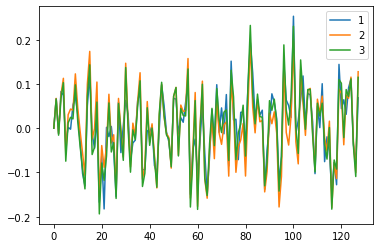

In [18]:
arima1 = ARIMA(Z, order = (0, 0, 1))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (0, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Z, order = (0, 0, 3))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

arima1 = ARIMA(Z, order = (1, 0, 1))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (1, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima1 = ARIMA(Z, order = (2, 0, 1))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (2, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima1 = ARIMA(Z, order = (3, 0, 1))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (3, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Z, order = (3, 0, 3))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())



plt.plot(model_fit1.fittedvalues, label='1')
plt.plot(model_fit2.fittedvalues, label='2')
plt.plot(model_fit3.fittedvalues, label='3')
plt.legend()
plt.show()

Выбираем arima1 order = (0, 0, 1) (имеет наименьший параметр BIC)

Обратимся к прогнозированию на основе АРПСС моделей. Загрузим файл:

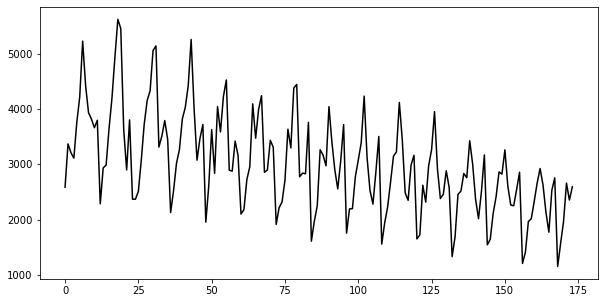

In [19]:
file = h5py.File('Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.show()

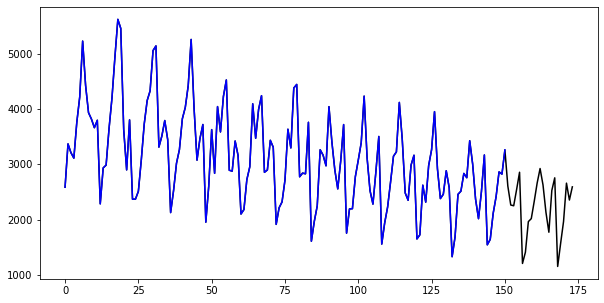

In [20]:
Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t=np.arange(0, len(Z), 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанный ряд
plt.show()

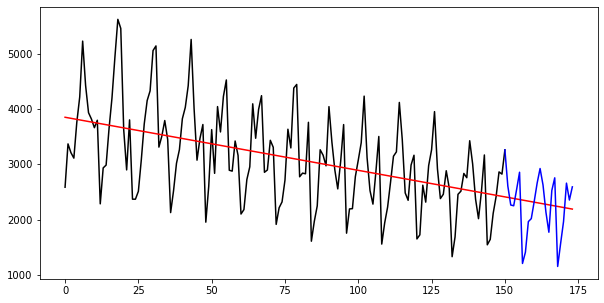

In [21]:
t=np.arange(0, len(Z), 1) # диапазон урезанного ряда
t=t.reshape(-1,1)
t0=np.arange(0, len(Fort), 1) # диапазон полного ряда
t0=t0.reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t, Z) # модель регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, reg.predict(t0), 'r') # прогноз на весь диапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

In [22]:
Z_minus_trend = Z - reg.predict(t0)[:len(Fort)-24+1]

In [23]:
arimaz = ARIMA(Z_minus_trend, order = (10, 0, 0))
model_fit = arimaz.fit(disp = False) # подгоняем под ВР
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                    ARMA(10, 0)   Log Likelihood               -1134.311
Method:                       css-mle   S.D. of innovations            434.656
Date:                Sun, 30 May 2021   AIC                           2292.621
Time:                        23:27:17   BIC                           2328.829
Sample:                             0   HQIC                          2307.331
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8890     10.203      0.577      0.564     -14.109      25.887
ar.L1.y        0.1049      0.074      1.410      0.158      -0.041       0.251
ar.L2.y       -0.4077      0.074     -5.507      0.0

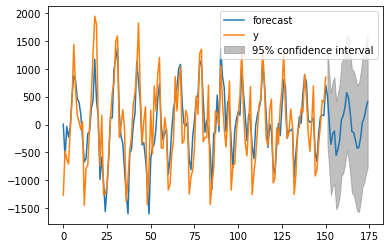

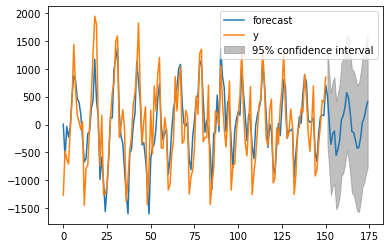

In [24]:
model_fit.plot_predict(0, len(Fort)) # график прогноза по данной модели вместе с доверительными интервалами

Как этот прогноз по АРПСС модели соотносится с исходными известными 24 прогнозными точками

<Figure size 720x360 with 0 Axes>

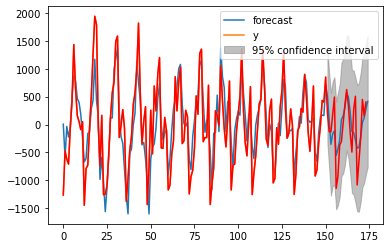

In [25]:
plt.figure(figsize = (10, 5))
model_fit.plot_predict(0, len(Fort)) # прогноз по АРПСС
plt.plot(t0, Fort - reg.predict(t0), 'r') # исходный ВР минус тренд
plt.show()

In [26]:
model_fit.predict(len(Z), len(Fort))

array([ 506.47180697,   69.10913054, -354.29104904, -166.7836986 ,
       -115.4980613 , -554.72231882, -440.3745966 , -284.86727629,
         88.70013116,  154.22131323,  302.66890903,  570.01871811,
        489.46730326,  227.20576199, -125.77682796, -145.5644601 ,
       -275.32637264, -424.79902652, -409.0593276 , -229.44621795,
         37.53958351,  119.03454305,  278.20946913,  412.19075672])

In [27]:
print ('Средняя ошибка прогноза',abs(np.sum(Fort[-24:])-np.sum(model_fit.predict(len(Z), len(Fort))))/len(Fort[-24:]))

Средняя ошибка прогноза 2277.9029919468076


In [28]:
X = np.zeros(len(Fort))
Y0 = np.zeros(len(Fort)-24)
Y = model_fit.predict(len(Z), len(Fort))
Y=np.hstack((Y0,Y))

for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-Y[i])**2

print('СКВО прогноза:',np.sqrt(np.sum(X)/len(Fort[-24:])))

СКВО прогноза: 2325.5526644672186


In [29]:
X = np.zeros(len(Fort))
Y0 = np.zeros(len(Fort)-24)
Y = model_fit.predict(len(Z), len(Fort))
Y=np.hstack((Y0,Y))

for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-Y[i] ))/Fort[i]

print('Средняя ошибка апроксимации:',(np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации: 102.91202409269427


Построим АРПСС модель для прогнозирования данного ряда, но без исходного вычитания из него линейного тренда.

In [30]:
arimaz = ARIMA(Z, order = (10, 0, 0))
model_fit = arimaz.fit(disp = False)
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                    ARMA(10, 0)   Log Likelihood               -1178.397
Method:                       css-mle   S.D. of innovations            588.205
Date:                Sun, 30 May 2021   AIC                           2380.793
Time:                        23:27:26   BIC                           2417.001
Sample:                             0   HQIC                          2395.503
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3134.0707    182.347     17.187      0.000    2776.676    3491.465
ar.L1.y        0.5971      0.081      7.370      0.000       0.438       0.756
ar.L2.y       -0.0996      0.093     -1.069      0.2

In [31]:
print ('Средняя ошибка прогноза',abs(np.sum(Fort[-24:])-np.sum(model_fit.predict(len(Z), len(Fort))))/len(Fort[-24:]))

Средняя ошибка прогноза 712.1122158855991


In [32]:
X = np.zeros(len(Fort))
Y0 = np.zeros(len(Fort)-24)
Y = model_fit.predict(len(Z), len(Fort))
Y=np.hstack((Y0,Y))

for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-Y[i])**2

print('СКВО прогноза:',np.sqrt(np.sum(X)/len(Fort)))

СКВО прогноза: 322.0297410552436


In [33]:
X = np.zeros(len(Fort))
Y0 = np.zeros(len(Fort)-24)
Y = model_fit.predict(len(Z), len(Fort))
Y=np.hstack((Y0,Y))

for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-Y[i] ))/Fort[i]

print('Средняя ошибка апроксимации:',(np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка апроксимации: 40.865221044860434


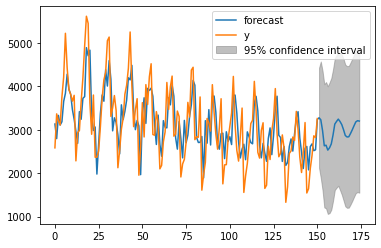

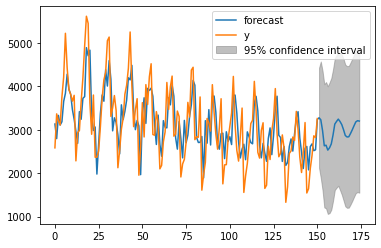

In [34]:
model_fit.plot_predict(0, len(Fort))